## Introduction to Time Series Plots

This notebook aims to show different terminologies and attributes of a time series by generating
and plotting synthetic data. Trying out different prediction models on this kind of data is a good way
to develop your intuition when you get hands-on with real-world data later in the course. Let's begin!

## Imports

You will mainly be using **Numpy** and **Matplotlib's** Pyplot library to generate the data and plot the
graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot Utilities

You will be plotting several graphs in this notebook so it's good to have a utility function for that.
The following code will visualize numpy arrays into a graph using Pyplot's plot() method. The x-axis
will contain the time steps. The exact unit is not critical for this exercise so you can pretend it is
either seconds, hours, year, etc. The y-axis will contain the measured values at each time step.

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  """
  Visualizes time series data
  Args:
    time (array of int) - contains the time steps
    series (array of int) - contains the measurements for each time step
    format (string) - line style when plotting the graph
    start (int) - first time step to plot
    end (int) - last time step to plot
    label (list of strings)- tag for the line
  """

  # Setup dimensions of the graph figure
  plt.figure(figsize=(10,6))

  # plot the time series data
  plt.plot(time[start:end], series[start:end], format)

  # label the x-axis
  plt.xlabel("Time")

  # label the y-axis
  plt.ylabel("Value")

  if label:
    plt.legend(fontsize=14, labels=label)

  # overlay a grid on the graph
  plt.grid(True)

  # Draw the grap on screen
  plt.show()

## Trend

The trend describes the general tendency of the values to go up or down as time progresses. Given
a certain time period, you can see if the graph is following an upward/positive trend,
downward/negative trend, or just flat. For instance, the housing prices in a good location can see a
general increase in valuation as time passes.
The simplest example to visualize is data that follows a straight line. You will use the function
below to generate that. The slope argument will determine what the trend is. If you're coming from

a mathematics background, you might recognize this as the slope-intercept form with the y-
intercept being 0 .

In [3]:
def trend(time, slope=0):
  """
  Generates synthetic data that follows a straight line given a slope value.
  Args:
    time (array of int) - contains the time steps
    slope (float) - determines the direction and steepness of the line
  Returns:
    series (array of float) - measurements that follow a straight line
  """
  # Compute the linear series given the slope
  series = slope * time
  return series

Here is a time series that trends upward. For a downward trend, simply replace the slope value
below with a negative value (e.g. -0.3 ).

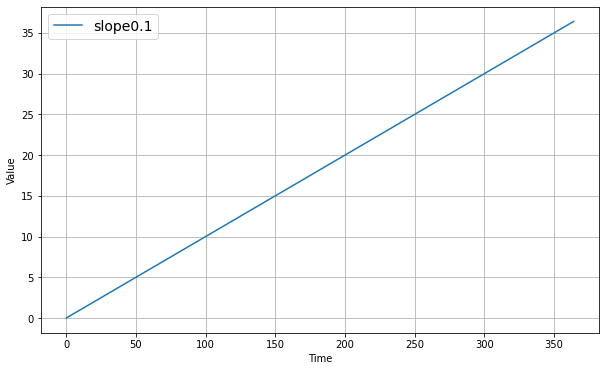

In [4]:
# Generate time step. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (you can revise this)
slope = 0.1

# Generate measurement with the defined slope
series = trend(time, slope)

# Plot the result 
plot_series(time, series, label=[f'slope{slope}'])

As you can tell, you don't need machine learning to model this behavior. You can simply solve for
the equation of the line and you have the perfect prediction model. Data like this is extremely rare in
real world applications though and the trend line is simply used as a guide like the one shown in the
Moore's Law example in class.

## Seasonality

Another attribute you may want to look for is seasonality. This refers to a recurring pattern at
regular time intervals. For instance, the hourly temperature might oscillate similarly for 10
consecutive days and you can use that to predict the behavior on the next day.
You can use the functions below to generate a time series with a seasonal pattern:

In [5]:
def seasonal_pattern(season_time):
  """
  Just an arbitarary patternn, you can change it if you wish

  Args:
    season_time (array of float) - contains the measurements per time step

  Returns:
    data_pattern (array of float) - contains revised measurement values according to the difined pattern
  """
  # generate the value using an arbitrary pattern
  data_pattern = np.where(season_time < 0.4,
                          np.cos(season_time * 2 * np.pi),
                          1 / np.exp(3 * season_time))
  
  return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
  """
  Repeats the same pattern at each period

  Args:
    time (array of int) - contains the time step
    period (int) - number of time steps before the pattern repeats
    amplitude (int) - peak measure value in a period
    phase (int) - number of time step to shift the measured values

  Returns:
    data_pattern (array of float) - seasonal data scaled by the defined amplitude
  """
  # Define the measured values per period
  season_time = ((time + phase ) % period) / period

  # Generate the seasonal data scaled by the defined amplitudo
  data_pattern = amplitude * seasonal_pattern(season_time)

  return data_pattern

The cel below shows the seasonality of the data generated because you can see the pattern every 365 time steps.

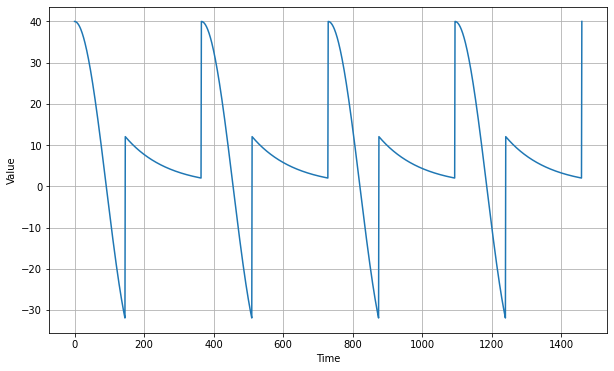

In [6]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the result
plot_series(time, series)

A time series can also contain both trend and seasonality. For example, the hourly temperature

might oscillate regularly in short time frames, but it might show an upward trend if you look at multi-
year data.

The example below demonstrates a seasonal pattern with an upward trend:

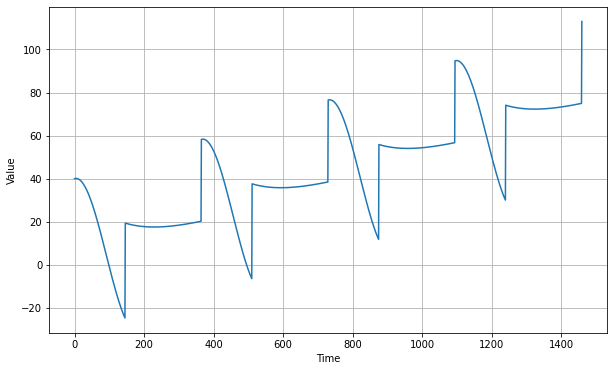

In [ ]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

## Noise

In practice, few real-life time series have such a smooth signal. They usually have some noise riding
over that signal. The next cells will show what a noisy signal looks like:

In [7]:
def noise(time, noise_level=1, seed=None):
  """
  Generates a normally distributed noisy signal

  Args:
    time (array of int) - contains the time steps
    noise_level (float) - scaling factor for the generated signal
    seed (int) - number generator seed for repeatability 

  Returns:
    noise (array of float) - the noisy signal
  """
  # Initialize the random number generator
  rnd = np.random.RandomState(seed)

  # Generate a random number for each time step and scale by the noise level
  noise = rnd.randn(len(time)) * noise_level

  return noise

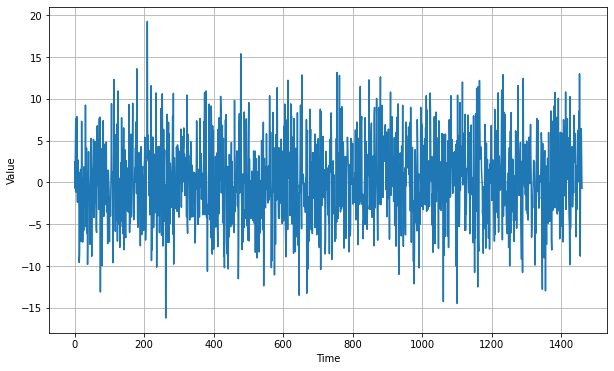

In [8]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the result
plot_series(time, noise_signal)

Now let's add this to the time series we generated earlier:

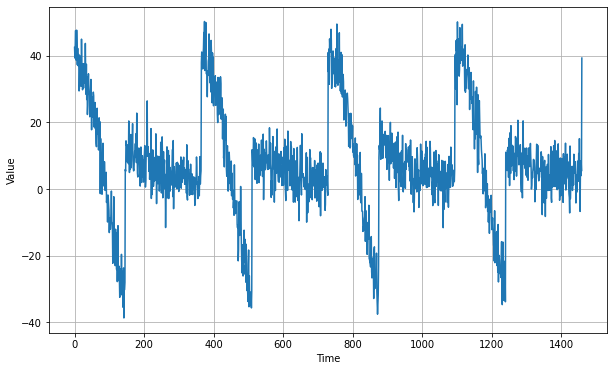

In [9]:
# Add the noise to the time series
series += noise_signal

# Plot the series
plot_series(time, series)

As you can see, the series is still trending upward and seasonal but there is more variation between
time steps because of the added noise.

## Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a
function of previous time steps. Here are some functions that demonstrate that. Notice lines that
refer to the step variable because this is where the computation from previous time steps happen.
It will also include noise (i.e. random numbers) to make the result a bit more realistic.

In [12]:
def autocorrelation(time, amplitude, seed=None):
  """
  Generate autocorrelated data

  Args:
    time (array of int) - contains the time steos
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability

  Returns:
    ar (array of float) - autocorrelated data
  """

  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Initialize array of random numbers equal to the length
  # of the given time step plut 50
  ar = rnd.randn(len(time) + 50)

  # Set first 50 elements to a constant
  ar[:50] = 100

  # Define scaling factors
  phi1 = 0.5
  phi2 = -0.1

# Autocorrelate element 51 onwards with the measurement at
# (t-50) and (t-30), where t is the current time step
  for step in range(50, len(time) + 50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step - 33]

  # Get the autocorrelated data and scale with the given amplitude.
  # The first 50 elements of the original array is truncated because
  # thoses are just constans and not autocorrelated.
  ar = ar[50:] * amplitude
  
  return ar


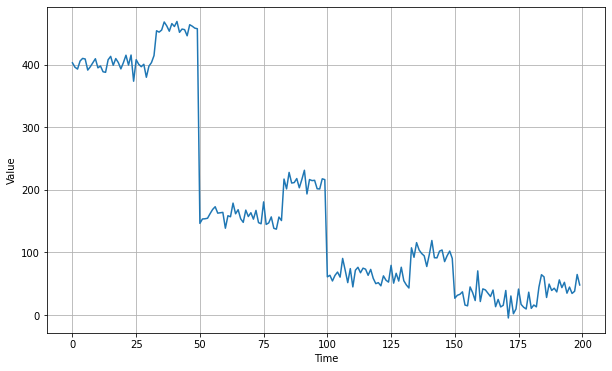

In [13]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

Here is a more straightforward autocorrelation function which just computes a value from the
previous time step.

In [14]:
def autocorrelation(time, amplitude, seed=None):
  """
  Generate autocorrelated data

  Args:
    time (array of int) - contains the time steos
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability

  Returns:
    ar (array of float) - autocorrelated data
  """

  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Initialize array of random numbers equal to the length
  # of the given time steps plus an additional step
  ar = rnd.randn(len(time) + 1)

  # Define scaling factor
  phi = 0.8

  # Autocorrelate element 11 inwards with the measurement at
  # (t-1), where t is the current time step
  for step in range(1, len(time) + 1):
    ar[step] += phi * ar[step - 1]

  # Get the autocorrelated data and scale with the gicen amplitude
  ar = ar[1:] * amplitude

  return ar

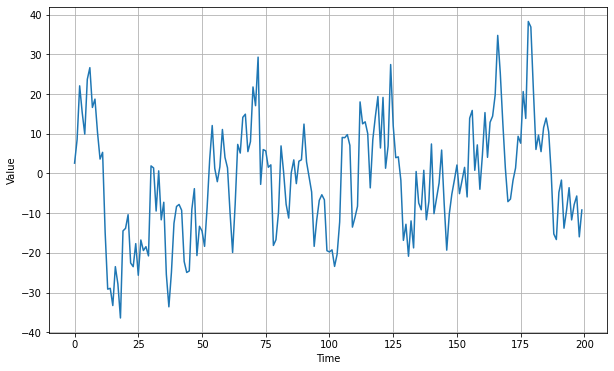

In [16]:
# use time step from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series you might encounter is one where it decays predictably after random spikes. You will first define the function that generates these spikes below. 

In [18]:
def impulses(time, num_impulses, amplitude=1, seed=None):
  """
  Generates random impulses
  Args:
   time (array of int) - contains the time steps
   num_impulses (int) - number of impulses to generate
   amplitude (float) - scaling factor
   seed (int) - number generator seed for repeatability
  Returns:
   series (array of float) - array containing the impulses
  """
  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Generate random numbers
  impulse_indices = rnd.randint(len(time), size=num_impulses)

  # Initialize series
  series = np.zeros(len(time))

  # Insert random impulses
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude

  return series

You will use the function above to generate a series with 10 random impulses.

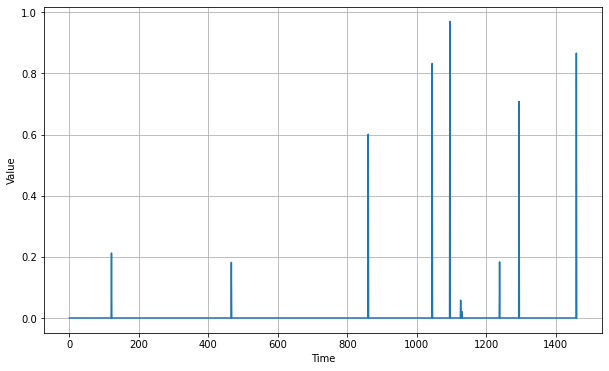

In [19]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)
# Plot the results
plot_series(time, impulses_signal)

Now that you have the series, you will next define the function that will decay the next values after it
spikes.

In [20]:
def autocorrelation_impulses(source, phis):
  """
  Generates autocorrelated data from impulses
  Args:
   source (array of float) - contains the time steps with impulses
   phis (dict) - dictionary containing the lag time and decay rates
  Returns:
   ar (array of float) - generated autocorrelated data
  """
  # Copy the source
  ar = source.copy()
  # Compute new series values based on the lag times and decay rates
  for step, value in enumerate(source):
    for lag, phi in phis.items():
      if step - lag > 0:
        ar[step] += phi * ar[step - lag]

  return ar

You can then use the function to generate the decay after the spikes. Here is one example that
generates the next value from the previous time step (i.e. t-1 , where t is the current time step):

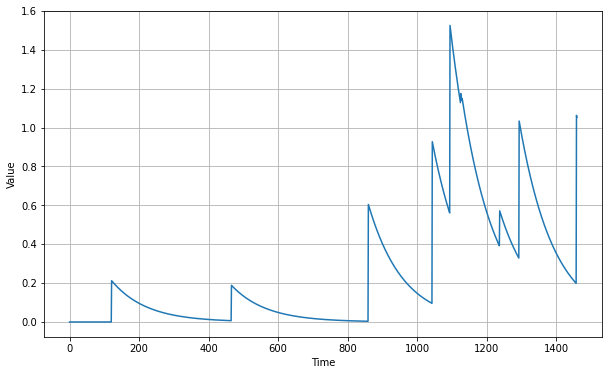

In [21]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})
# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in t-1 and t-50 :

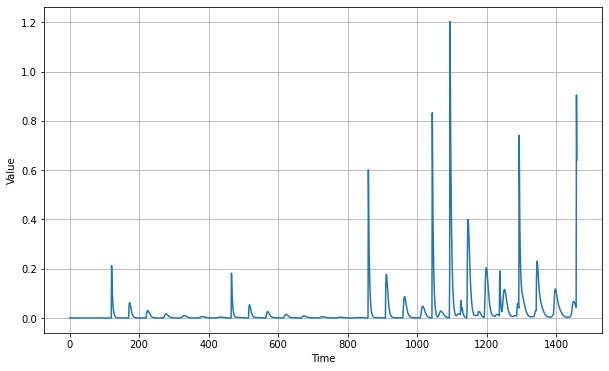

In [22]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})
# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

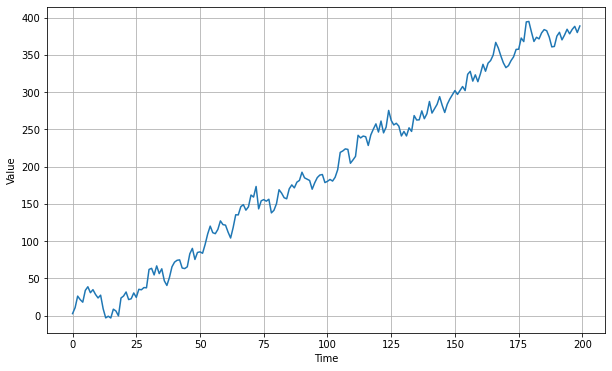

In [23]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

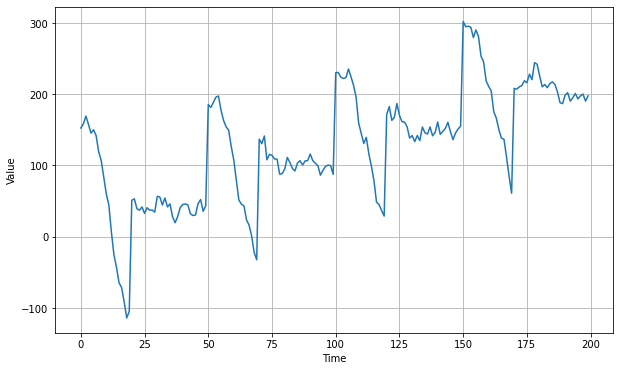

In [25]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + time
# Plot the results
plot_series(time[:200], series[:200])

## Non-stationary Time Series

It is also possible for the time series to break an expected pattern. As mentioned in the lectures, big
events can alter the trend or seasonal behavior of the data. It would look something like below
where the graph shifted to a downward trend at time step = 200.

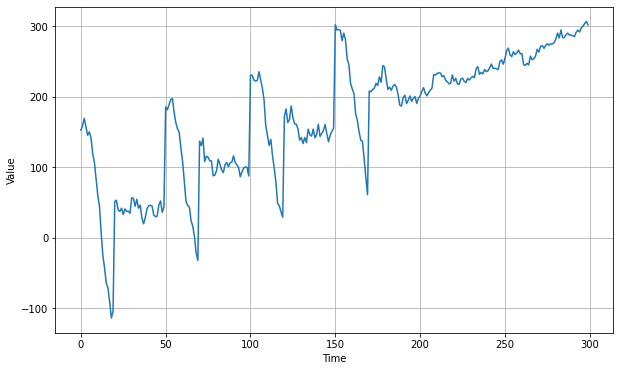

In [27]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + time
# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + time
# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]
# Plot the result
plot_series(time[:300], series[:300])

In cases like this, you may want to train your model on the later steps (i.e. starting at t=200) since
these present a stronger predictive signal to future time steps.

## Wrap Up

This concludes this introduction to time series terminologies and attributes. You also saw how to
generate them and you will use these to test different forecasting techniques in the next sections.
See you there!